# Объявления о продаже Skoda Octavia (2013 - 2020 года выпуска). 

## Данные с сайта nettiauto.com на основе 4870 объявлений

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set options
pd.set_option("max_colwidth", 100)

# library & dataset
import seaborn as sns

## 1. Просмотр датасета

In [2]:
df = pd.read_csv('skoda.csv')

In [3]:
df.head(3)

,Merkki,Vuosi,Ajettu,Hinta,Date
0,Make & model|Year|Mileage|Price|Sold date,Year,Mileage,Price,Sold date
1,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid ActiveEdtion|2019|23 000|23 850 €|06-2021",2019,23 000,23 850 €,06-2021
2,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|37 000|22 980 €|08-2021",2019,37 000,22 980 €,08-2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Merkki  9266 non-null   object
 1   Vuosi   9266 non-null   object
 2   Ajettu  9266 non-null   object
 3   Hinta   9266 non-null   object
 4   Date    9266 non-null   object
dtypes: object(5)
memory usage: 362.1+ KB


## 2. Чистка датасета

In [5]:
# переименуем столбцы
df = df.rename(columns = {'Merkki': 'model_description',
                         'Vuosi': 'Year',
                         'Ajettu': 'Mileage',
                         'Hinta': 'Price',
                         'Date': 'Sold_date'})

In [6]:
# удалим пробелы
df['Mileage'] = df['Mileage'].str.replace(" ", "")
df['Price'] = df['Price'].str.replace(" ", "")

In [7]:
#df.loc[4230:4250]

In [8]:
# разделим датасеты
df = df.loc[4235:]
df.head(3)

,model_description,Year,Mileage,Price,Sold_date
4235,Skoda Octavia (1.2)|2013|81 000|12 800 €|00-0000,2013,81000,12800€,00-0000
4236,"Skoda Octavia (1.8) Combi 1,8 TSI 4x4 Elegance DSG HUIPPUVARUSTEILLA!|2013|102 555|22 900 €|00-0000",2013,102555,22900€,00-0000
4237,"Skoda Octavia (1.4) 1,4 TSI Ambition DSG (MY14)|2013|99 000|17 000 €|00-0000",2013,99000,17000€,00-0000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5031 entries, 4235 to 9265
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   model_description  5031 non-null   object
 1   Year               5031 non-null   object
 2   Mileage            5031 non-null   object
 3   Price              5031 non-null   object
 4   Sold_date          5031 non-null   object
dtypes: object(5)
memory usage: 196.7+ KB


In [10]:
# удалим лишнее Vuosi
df = df.drop(df.query('Year == "Vuosi"').index.values.tolist())
df = df.drop(df.query('Year == "Year"').index.values.tolist())

# удалим данные где дата продажи 0
drop_nulls = df.query('Sold_date == "00-0000"').index.values.tolist()
df = df.drop(drop_nulls)

In [11]:
df['Year'].unique()

array(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [12]:
# приведем к формату времени
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [13]:
# приведем к формату времени
df['Sold_date'] = pd.to_datetime(df['Sold_date'], format='%m-%Y')

In [14]:
# удалим данные где мили Eiilmoitettu
drop_next = df[df['Mileage'] == 'Eiilmoitettu'].index.values.tolist()
for i in drop_next:
    df = df.drop(index = i)

In [15]:
# удалим данные где мили Eihin
drop_a = df[df['Price'] == 'Eihin'].index.values.tolist()
for i in drop_a:
    df = df.drop(index = i)

In [16]:
# удалим данные где не указан пробег
drop_ns = df[df['Mileage'] == 'Notspecified'].index.values.tolist()
for i in drop_ns:
    df = df.drop(index = i)

In [17]:
# мили целочисленные значения
df['Mileage'] = df['Mileage'].astype('float64') 

In [18]:
# цена 5 знаков
df['Price'] = df['Price'].str[:5]
# удалим пробелы
df['Price'] = df['Price'].str.replace("€", "")

In [19]:
# удалим данные где цена Eihin
drop_a = df[df['Price'] == 'Eihin'].index.values.tolist()
for i in drop_a:
    df = df.drop(index = i)

In [20]:
# удалим данные где цена Notpr
drop_nt = df[df['Price'] == 'Notpr'].index.values.tolist()
for i in drop_nt:
    df = df.drop(index = i)

In [21]:
# сделаем цену целочисленным значением
df['Price'] = df['Price'].astype(int) 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 4249 to 9265
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_description  4870 non-null   object        
 1   Year               4870 non-null   datetime64[ns]
 2   Mileage            4870 non-null   float64       
 3   Price              4870 non-null   int64         
 4   Sold_date          4870 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 228.3+ KB


In [23]:
df.head(3)

,model_description,Year,Mileage,Price,Sold_date
4249,Skoda Octavia (1.6) 1.6 TDI Elegance DSG|2013|217 000|8 780 €|09-2021,2013-01-01,217000.0,8780,2021-09-01
4250,"Skoda Octavia (1.6) Combi 1,6 TDI Experience DSG Juuri huollettu SUOMIauto|2013|297 000|5 000 €|...",2013-01-01,297000.0,5000,2021-08-01
4251,Skoda Octavia (2)|2013|291 000|8 900 €|06-2021,2013-01-01,291000.0,8900,2021-06-01


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 4249 to 9265
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_description  4870 non-null   object        
 1   Year               4870 non-null   datetime64[ns]
 2   Mileage            4870 non-null   float64       
 3   Price              4870 non-null   int64         
 4   Sold_date          4870 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 228.3+ KB


In [25]:
df['Age'] = (df['Sold_date'] - df['Year']) / np.timedelta64(1, 'Y')
df.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age
4249,Skoda Octavia (1.6) 1.6 TDI Elegance DSG|2013|217 000|8 780 €|09-2021,2013-01-01,217000.0,8780,2021-09-01,8.665476
4250,"Skoda Octavia (1.6) Combi 1,6 TDI Experience DSG Juuri huollettu SUOMIauto|2013|297 000|5 000 €|...",2013-01-01,297000.0,5000,2021-08-01,8.580601
4251,Skoda Octavia (2)|2013|291 000|8 900 €|06-2021,2013-01-01,291000.0,8900,2021-06-01,8.413588


In [26]:
df.describe()

,Mileage,Price,Age
count,4870.000000,4870.000000,4870.000000
mean,115534.268789,19411.998563,5.197286
std,66064.410180,6398.218731,2.062150
min,30.000000,2990.000000,1.330623
25%,65000.000000,14900.000000,3.581182
50%,108000.000000,18890.000000,5.330705
75%,157000.000000,23890.000000,6.833816
max,431000.000000,45900.000000,8.832488


In [27]:
# дропнем аномалию c пробегом
# max = df['Mileage'].max()
# drop_max = df.query('Mileage == 1310000').index.values.tolist()
# df = df.drop(drop_max)
# df.head(3)

In [28]:
# сделаем градацию по пробегу 

def mileage(col):
    if col < 20000:
        return "< 20000"
    elif 20000 <= col < 50000 :
        return "20000 - 49999"
    elif 50000 <= col < 79999 :
        return "50000 - 79999"
    elif 80000 <= col < 100000 :
        return "80000 - 99999"
    else:
        return ">= 100000"

# произведем замену значений в DF
df['mileage_range'] = df['Mileage'].apply(mileage)

In [29]:
# сделаем градацию по пробегу 

def ages_range(col):
    if col < 3:
        return "< 3"
    elif 3 <= col < 5 :
        return "3 - 4"
    elif 5 <= col < 8 :
        return "5 - 7"
    else:
        return ">= 8"

# произведем замену значений в DF
df['age_range'] = df['Age'].apply(ages_range)

#### смотрим двигатели

In [30]:
# посмотрим на мотор
df['engine'] = df['model_description'].str.extract(r'(\d.\d)')
df.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
4249,Skoda Octavia (1.6) 1.6 TDI Elegance DSG|2013|217 000|8 780 €|09-2021,2013-01-01,217000.0,8780,2021-09-01,8.665476,>= 100000,>= 8,1.6
4250,"Skoda Octavia (1.6) Combi 1,6 TDI Experience DSG Juuri huollettu SUOMIauto|2013|297 000|5 000 €|...",2013-01-01,297000.0,5000,2021-08-01,8.580601,>= 100000,>= 8,1.6
4251,Skoda Octavia (2)|2013|291 000|8 900 €|06-2021,2013-01-01,291000.0,8900,2021-06-01,8.413588,>= 100000,>= 8,201


In [31]:
df['engine'].unique()

array(['1.6', '201', '1.2', '1.4', '1.8', '2,0', '4x4', '2.0', '0,9',
       '155', '3.1', '1,9', '0.9', '1,0', '1.0', '196', '1.5', '1.9',
       '150', '9.8', '202'], dtype=object)

In [32]:
# выбросы "201=(2.0)", "2,0=(2.0)", "0,9=(2.0)"
df.query('engine == "1,0"')

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
6150,"Skoda Octavia (1) Combi 1,0 TSI Style DSG -Rekisteröity 12/2016-|2016|141 851|14 500 €(incl. VAT...",2016-01-01,141851.0,14500,2021-06-01,5.415580,>= 100000,5 - 7,"1,0"
6168,"Skoda Octavia (1) Skoda OCTAVIA 1,0 TSI Style DSG ** 2xrenkaat / 1. Om. ** Korkotarjous 1,9%+Kul...",2016-01-01,48000.0,17900,2021-08-01,5.582592,20000 - 49999,5 - 7,"1,0"
6190,"Skoda Octavia (1) Combi 1,0 TSI Style DSG Autom. **** LänsiAuto Safe -sopimus hintaan 590e ****|...",2016-01-01,70000.0,17750,2021-06-01,5.415580,50000 - 79999,5 - 7,"1,0"
6220,"Skoda Octavia (1) 1,0 TSI Style ***1.om*** NETTOTARJOUS|2016|98 000|15 490 €|09-2021",2016-01-01,98000.0,15490,2021-09-01,5.667468,80000 - 99999,5 - 7,"1,0"
6250,"Skoda Octavia (1) 1,0 TSI Style DSG Autom. *** , Rahoitus 0,99%+kulut|2016|56 000|18 800 €|06-2021",2016-01-01,56000.0,18800,2021-06-01,5.415580,50000 - 79999,5 - 7,"1,0"
...,...,...,...,...,...,...,...,...,...
9107,"Skoda Octavia (1) 1,0 TSI Style BusinessLine, 1-omistaja, Navigointi, Webasto, Vetokoukku|2020|9...",2020-01-01,9000.0,23900,2021-08-01,1.582510,< 20000,< 3,"1,0"
9128,"Skoda Octavia (1) Combi 1,0 TSI Style eTEC DSG Autom. **Navigointi, Led-Matrix**|2020|11 000|31 ...",2020-01-01,11000.0,31900,2021-09-01,1.667385,< 20000,< 3,"1,0"
9157,"Skoda Octavia (1) 1,0 TSI Ambition BusinessLine - Tyylikäs ja taloudellinen isonkin perheen tila...",2020-01-01,23000.0,21490,2021-11-01,1.834398,20000 - 49999,< 3,"1,0"
9197,"Skoda Octavia (1) Combi 1,0 TSI Ambition BusinessLine - Suomiauto, 1 omistajalta, Polttoainetoim...",2020-01-01,40000.0,22900,2021-10-01,1.749523,20000 - 49999,< 3,"1,0"


In [33]:
df.loc[df['engine'] == '201','engine'] = '2.0'
df.loc[df['engine'] == '2,0','engine'] = '2.0'
df.loc[df['engine'] == '4x4','engine'] = '2.0'
df.loc[df['engine'] == '0,9','engine'] = '2.0'
df.loc[df['engine'] == '155','engine'] = '2.0'
df.loc[df['engine'] == '3.1','engine'] = '2.0'
df.loc[df['engine'] == '1.9','engine'] = '2.0'
df.loc[df['engine'] == '0.9','engine'] = '2.0'
df.loc[df['engine'] == '1,9','engine'] = '1.0'
df.loc[df['engine'] == '196','engine'] = '2.0'
df.loc[df['engine'] == '150','engine'] = '2.0'
df.loc[df['engine'] == '9.8','engine'] = '2.0'
df.loc[df['engine'] == '202','engine'] = '2.0'
df.loc[df['engine'] == '1,0','engine'] = '1.0'

## 3. Графики 

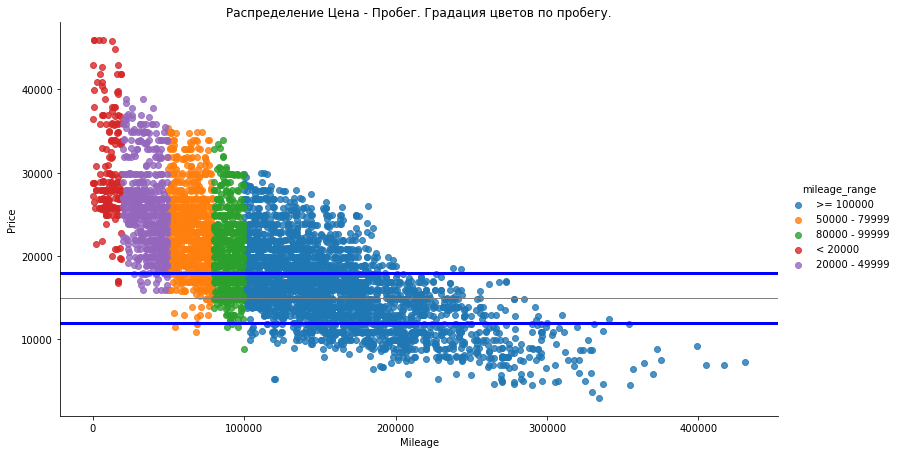

In [34]:
up_limit_budget = 18000
target_limit_budget = 15000
low_limit_budget = 12000
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='mileage_range', 
           legend=True, 
           height=6, 
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по пробегу.");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);

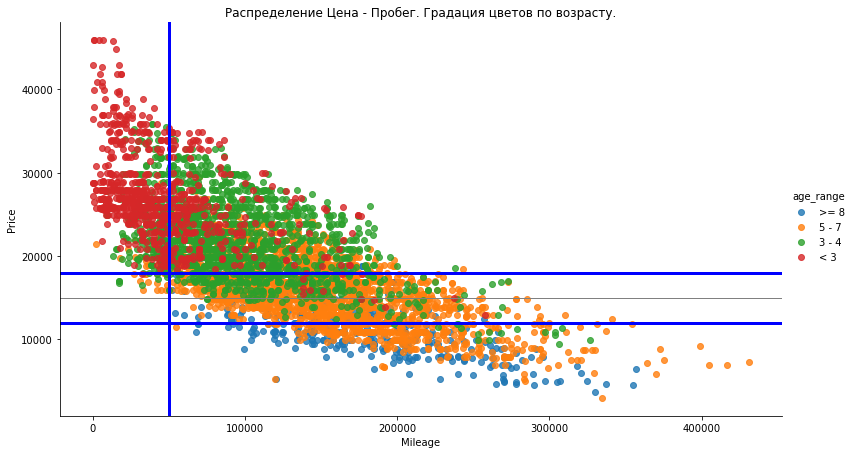

In [35]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='age_range', 
           legend=True, 
           height=6,
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по возрасту.");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axvline(50000, linestyle = '-', color ='blue', linewidth = 3);

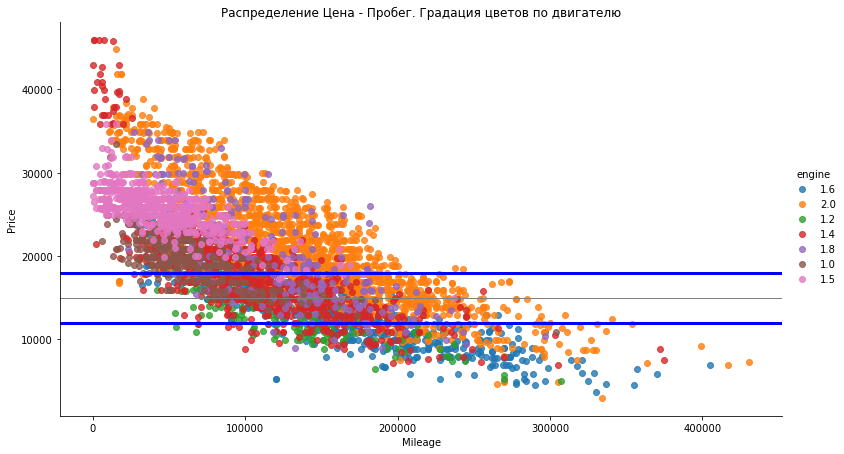

In [36]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='engine', 
           legend=True, 
           height=6,
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по двигателю");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);

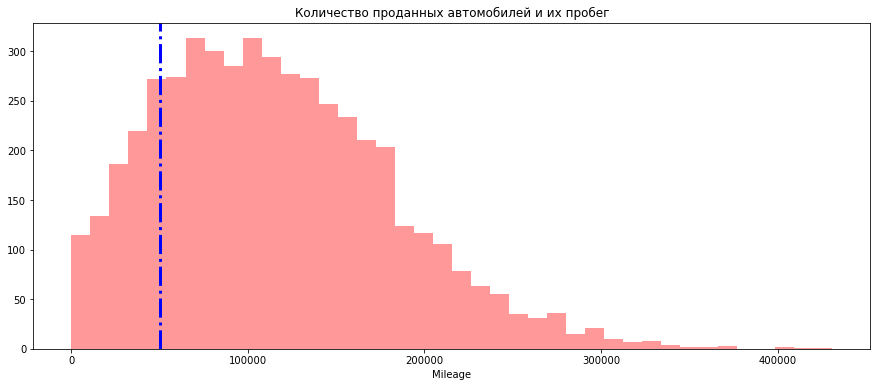

In [37]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot( df['Mileage'], 
             hist=True, 
             kde=False, 
             rug=False, 
             color="red" ).set_title('Количество проданных автомобилей и их пробег');
plt.axvline(50000, linestyle = '-.', color ='blue', linewidth = 3);
plt.xlabel("Mileage");

In [38]:
pivot_report = pd.pivot_table(df, 
                              values='Price', 
                              index=['engine'], 
                              aggfunc={'count','median'}).reset_index()
pivot_report

,engine,count,median
0,1.0,314,19725
1,1.2,204,12900
2,1.4,928,16925
3,1.5,614,25800
4,1.6,836,13880
5,1.8,243,18900
6,2.0,1731,20500


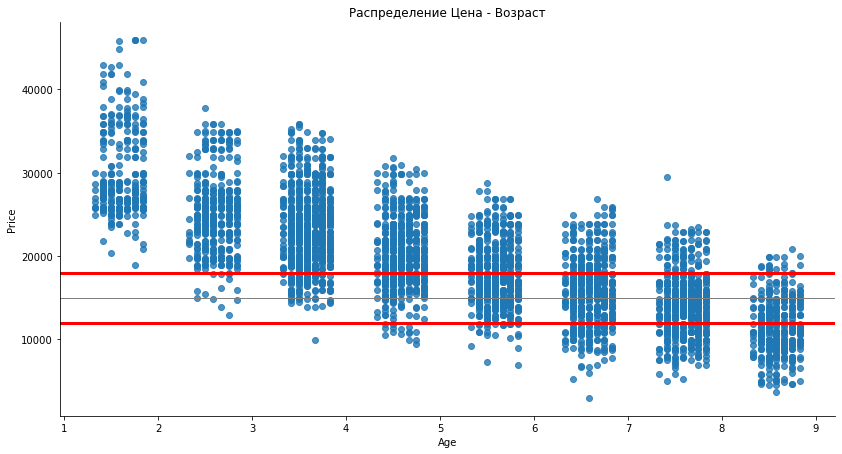

In [39]:
#fig, ax = plt.subplots(figsize=(15,6))
#ax.set_title("Распределение Год - Цена");
#use the function regplot to make a scatterplot
#sns.regplot(x=df["Age"], y=df["Price"]);

sns.lmplot(x="Age", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           legend=False,
           height=6,
           aspect=16/8.27)
ax = plt.gca();
ax.set_title("Распределение Цена - Возраст");
plt.axhline(up_limit_budget, linestyle = '-', color ='red', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='red', linewidth = 3);

In [40]:
df.corr()

,Mileage,Price,Age
Mileage,1.000000,-0.737634,0.651624
Price,-0.737634,1.000000,-0.761682
Age,0.651624,-0.761682,1.000000


## 4. Выборка из того, что интересно для покупки

In [41]:
int = df[(df['mileage_range'] == '< 20000')|(df['mileage_range'] == '20000 - 49999')]
int.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
4797,"Skoda Octavia (1.4) 1,4 TSI Elegance DSG (MY14) Ajettu vain 18000 km!!|2014|18 000|19 800 €|07-2021",2014-01-01,18000.0,19800,2021-07-01,7.496389,< 20000,5 - 7,1.4
4819,"Skoda Octavia (1.4) Combi 1,4 TSI Elegance DSG Autom. ** 1-om Suomi- Auto / Vakkari / KeyLessGo ...",2014-01-01,35000.0,19400,2021-09-01,7.666140,20000 - 49999,5 - 7,1.4
4824,"Skoda Octavia (1.4) 1,4 TSI Ambition DSG Autom. *KORKOTARJOUS 1,49% + KULUT*|2014|45 000|15 900 ...",2014-01-01,45000.0,15900,2021-06-01,7.414252,20000 - 49999,5 - 7,1.4


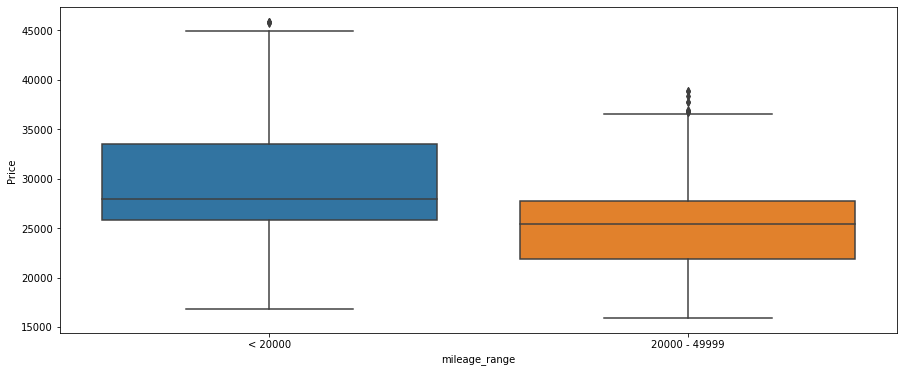

In [42]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot( x=int["mileage_range"], y=int["Price"] );

In [43]:
new = df[df['mileage_range'] == '< 20000']
semi_new = df[df['mileage_range'] == '20000 - 49999']

In [44]:
new_price = new['Price'].median()
new_age = new['Age'].median()
print('медианная цена Skoda Octavia с пробегом до 20 000 км = {:.2f}, возраст автомобиля = {:.3f}'.format(new_price,new_age))

seminew_price = semi_new['Price'].median()
seminew_age = semi_new['Age'].median()
print('медианная цена Skoda Octavia с пробегом от 20000 км до 49999 км = {:.2f}, возраст автомобиля = {:.3f}'.format(seminew_price,seminew_age))

медианная цена Skoda Octavia с пробегом до 20 000 км = 27900.00, возраст автомобиля = 1.583
медианная цена Skoda Octavia с пробегом от 20000 км до 49999 км = 25400.00, возраст автомобиля = 2.749


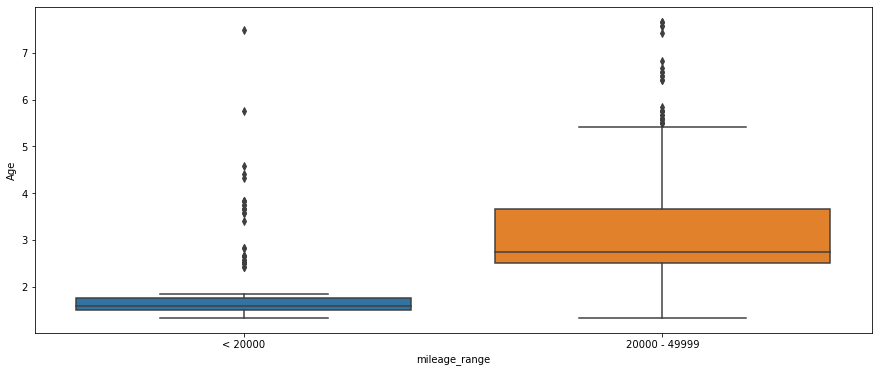

In [45]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot( x=int["mileage_range"], y=int["Age"] );

In [46]:
start_range = semi_new['Price'].quantile(0.25) # 25%
end_range = semi_new['Price'].quantile(0.5) # 50%

In [47]:
print('выгодная цена для Skoda Octavia c пробегом от 20000 км до 49999 км = {:.2f} - {:.2f}'.format(start_range,end_range))

выгодная цена для Skoda Octavia c пробегом от 20000 км до 49999 км = 21900.00 - 25400.00


### Выводы

- медианная цена Skoda Octavia с пробегом до 20 000 км = 27900.00, возраст автомобиля = 1.583

- медианная цена Skoda Octavia с пробегом от 20000 км до 49999 км = 25400.00, возраст автомобиля = 2.749

- выгодная цена для Skoda Octavia c пробегом от 20000 км до 49999 км = 21900.00 - 25400.00